<a href="https://colab.research.google.com/github/just-suraj-j/Log_Processing_App/blob/main/consumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from kafka import KafkaConsumer
import json
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
broker = "localhost:9092"
topic = "logstashKafkaProducer"
group_id = "my-group"
logger = None

In [ ]:
consumer = KafkaConsumer(bootstrap_servers=broker,group_id=group_id,consumer_timeout_ms=60000,auto_offset_reset='earliest',enable_auto_commit=False,value_deserializer=lambda m: json.loads(m.decode('ascii')))

In [ ]:
consumer.subscribe(topic)

In [ ]:
l = []
for message in consumer:
    print(message.value)
    l.append(message.value)

{'timestamp': '24/Aug/2022:02:58:51 +0530', 'event': {'original': '102.139.131.225 - - [24/Aug/2022:02:58:51 +0530] "PUT /search/tag/list HTTP/1.0" 200 4947 "http://smith-douglas.info/explore/main/terms.html" "Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_6 like Mac OS X) AppleWebKit/534.0 (KHTML, like Gecko) FxiOS/18.2i3948.0 Mobile/75X957 Safari/534.0"'}, '@timestamp': '2022-08-26T19:06:37.430136Z', 'http': {'version': '1.0', 'request': {'referrer': 'http://smith-douglas.info/explore/main/terms.html', 'method': 'PUT'}, 'response': {'status_code': 200, 'body': {'bytes': 4947}}}, 'user_agent': {'original': 'Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_6 like Mac OS X) AppleWebKit/534.0 (KHTML, like Gecko) FxiOS/18.2i3948.0 Mobile/75X957 Safari/534.0'}, 'url': {'original': '/search/tag/list'}, 'source': {'address': '102.139.131.225'}, '@version': '1', 'message': '102.139.131.225 - - [24/Aug/2022:02:58:51 +0530] "PUT /search/tag/list HTTP/1.0" 200 4947 "http://smith-douglas.info/explore/main/terms.ht

In [ ]:
df = pd.DataFrame(l)
df.head()

,timestamp,event,@timestamp,http,user_agent,url,source,@version,message
0,24/Aug/2022:02:58:51 +0530,{'original': '102.139.131.225 - - [24/Aug/2022...,2022-08-26T19:06:37.430136Z,"{'version': '1.0', 'request': {'referrer': 'ht...",{'original': 'Mozilla/5.0 (iPhone; CPU iPhone ...,{'original': '/search/tag/list'},{'address': '102.139.131.225'},1,102.139.131.225 - - [24/Aug/2022:02:58:51 +053...
1,24/Aug/2022:03:07:30 +0530,{'original': '14.113.182.251 - - [24/Aug/2022:...,2022-08-26T19:06:37.439869Z,"{'version': '1.0', 'request': {'referrer': 'ht...",{'original': 'Mozilla/5.0 (Android 4.2.1; Mobi...,{'original': '/explore'},{'address': '14.113.182.251'},1,14.113.182.251 - - [24/Aug/2022:03:07:30 +0530...
2,24/Aug/2022:02:52:08 +0530,{'original': '74.172.59.81 - - [24/Aug/2022:02...,2022-08-26T19:06:37.417664Z,"{'version': '1.0', 'request': {'referrer': 'ht...",{'original': 'Mozilla/5.0 (iPhone; CPU iPhone ...,{'original': '/posts/posts/explore'},{'address': '74.172.59.81'},1,74.172.59.81 - - [24/Aug/2022:02:52:08 +0530] ...
3,24/Aug/2022:02:57:03 +0530,{'original': '100.166.34.60 - - [24/Aug/2022:0...,2022-08-26T19:06:37.429688Z,"{'version': '1.0', 'request': {'referrer': 'ht...",{'original': 'Opera/9.37.(Windows 98; lb-LU) P...,{'original': '/explore'},{'address': '100.166.34.60'},1,100.166.34.60 - - [24/Aug/2022:02:57:03 +0530]...
4,24/Aug/2022:02:56:29 +0530,{'original': '170.12.52.197 - - [24/Aug/2022:0...,2022-08-26T19:06:37.429133Z,"{'version': '1.0', 'request': {'referrer': 'ht...",{'original': 'Mozilla/5.0 (Linux; Android 3.2....,{'original': '/explore'},{'address': '170.12.52.197'},1,170.12.52.197 - - [24/Aug/2022:02:56:29 +0530]...


In [ ]:
msg_df=df['message']

In [ ]:
host_pattern = r'(^\S+\.[\S+\.]+\S+)\s'
hosts = [re.search(host_pattern, item).group(1)
           if re.search(host_pattern, item)
           else 'no match'
           for item in msg_df]
hosts

['102.139.131.225',
 '14.113.182.251',
 '74.172.59.81',
 '100.166.34.60',
 '170.12.52.197',
 '99.52.40.102',
 '110.180.19.251',
 '116.221.233.116',
 '39.240.44.106',
 '143.172.1.238',
 '173.12.166.145',
 '10.42.45.36',
 '106.156.66.155',
 '69.83.65.66',
 '11.57.95.221',
 '208.71.54.67',
 '11.196.148.233',
 '117.80.184.235',
 '109.36.228.252',
 '51.73.248.19',
 '94.200.102.140',
 '74.115.56.153',
 '139.190.45.68',
 '78.27.49.114',
 '166.36.56.149',
 '109.190.167.218',
 '117.115.110.249',
 '106.252.239.35',
 '63.81.208.76',
 '111.12.24.93',
 '53.165.33.230',
 '192.178.19.171',
 '18.109.18.51',
 '198.45.151.80',
 '97.115.75.253',
 '160.2.145.36',
 '153.87.130.214',
 '64.221.0.4',
 '203.238.189.57',
 '32.138.203.16',
 '169.68.33.253',
 '25.26.196.106',
 '193.96.251.62',
 '220.149.163.137',
 '69.171.147.126',
 '76.229.0.156',
 '34.29.221.163',
 '16.106.122.28',
 '28.95.108.147',
 '123.83.192.87',
 '152.76.7.223',
 '129.245.17.249',
 '54.170.75.223',
 '31.250.161.243',
 '187.7.1.254',
 '134.

In [ ]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
               if re.search(method_uri_protocol_pattern, item)
               else 'no match'
              for item in msg_df]
method_uri_protocol

[('PUT', '/search/tag/list', 'HTTP/1.0'),
 ('GET', '/explore', 'HTTP/1.0'),
 ('GET', '/posts/posts/explore', 'HTTP/1.0'),
 ('GET', '/explore', 'HTTP/1.0'),
 ('GET', '/explore', 'HTTP/1.0'),
 ('PUT', '/app/main/posts', 'HTTP/1.0'),
 ('GET', '/list', 'HTTP/1.0'),
 ('GET', '/wp-content', 'HTTP/1.0'),
 ('GET', '/wp-admin', 'HTTP/1.0'),
 ('POST', '/explore', 'HTTP/1.0'),
 ('GET', '/apps/cart.jsp?appID=3414', 'HTTP/1.0'),
 ('DELETE', '/apps/cart.jsp?appID=6823', 'HTTP/1.0'),
 ('GET', '/app/main/posts', 'HTTP/1.0'),
 ('DELETE', '/explore', 'HTTP/1.0'),
 ('GET', '/list', 'HTTP/1.0'),
 ('GET', '/apps/cart.jsp?appID=9405', 'HTTP/1.0'),
 ('GET', '/search/tag/list', 'HTTP/1.0'),
 ('GET', '/list', 'HTTP/1.0'),
 ('GET', '/wp-admin', 'HTTP/1.0'),
 ('PUT', '/wp-admin', 'HTTP/1.0'),
 ('PUT', '/wp-content', 'HTTP/1.0'),
 ('GET', '/wp-admin', 'HTTP/1.0'),
 ('GET', '/explore', 'HTTP/1.0'),
 ('PUT', '/wp-admin', 'HTTP/1.0'),
 ('PUT', '/apps/cart.jsp?appID=6547', 'HTTP/1.0'),
 ('GET', '/wp-content', 'HTTP/1

In [ ]:
method=[]
for i in range(0,len(method_uri_protocol)):
    method.append(method_uri_protocol[i][0])
method

['PUT',
 'GET',
 'GET',
 'GET',
 'GET',
 'PUT',
 'GET',
 'GET',
 'GET',
 'POST',
 'GET',
 'DELETE',
 'GET',
 'DELETE',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'PUT',
 'PUT',
 'GET',
 'GET',
 'PUT',
 'PUT',
 'GET',
 'PUT',
 'GET',
 'PUT',
 'GET',
 'DELETE',
 'GET',
 'PUT',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'DELETE',
 'GET',
 'GET',
 'POST',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'DELETE',
 'DELETE',
 'GET',
 'POST',
 'GET',
 'GET',
 'DELETE',
 'PUT',
 'GET',
 'PUT',
 'GET',
 'GET',
 'PUT',
 'GET',
 'GET',
 'GET',
 'PUT',
 'PUT',
 'GET',
 'DELETE',
 'DELETE',
 'PUT',
 'GET',
 'GET',
 'POST',
 'GET',
 'PUT',
 'GET',
 'DELETE',
 'DELETE',
 'DELETE',
 'GET',
 'GET',
 'DELETE',
 'PUT',
 'GET',
 'PUT',
 'PUT',
 'DELETE',
 'DELETE',
 'PUT',
 'GET',
 'GET',
 'DELETE',
 'GET',
 'POST',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'GET',
 'DELETE',
 'PUT',
 'PUT',
 'GET',
 'GET',
 'PUT',
 'POST',
 'GET',
 'GET',
 'PUT',
 'GET',
 'GET',
 'DELETE',
 'PUT',
 'GET',
 'GE

In [ ]:
endpoint=[]
for i in range(0,len(method_uri_protocol)):
    endpoint.append(method_uri_protocol[i][1])
endpoint

['/search/tag/list',
 '/explore',
 '/posts/posts/explore',
 '/explore',
 '/explore',
 '/app/main/posts',
 '/list',
 '/wp-content',
 '/wp-admin',
 '/explore',
 '/apps/cart.jsp?appID=3414',
 '/apps/cart.jsp?appID=6823',
 '/app/main/posts',
 '/explore',
 '/list',
 '/apps/cart.jsp?appID=9405',
 '/search/tag/list',
 '/list',
 '/wp-admin',
 '/wp-admin',
 '/wp-content',
 '/wp-admin',
 '/explore',
 '/wp-admin',
 '/apps/cart.jsp?appID=6547',
 '/wp-content',
 '/search/tag/list',
 '/explore',
 '/posts/posts/explore',
 '/wp-content',
 '/list',
 '/wp-admin',
 '/apps/cart.jsp?appID=5992',
 '/wp-content',
 '/app/main/posts',
 '/app/main/posts',
 '/search/tag/list',
 '/posts/posts/explore',
 '/search/tag/list',
 '/app/main/posts',
 '/apps/cart.jsp?appID=8454',
 '/wp-content',
 '/wp-admin',
 '/wp-admin',
 '/list',
 '/wp-content',
 '/apps/cart.jsp?appID=6587',
 '/search/tag/list',
 '/wp-content',
 '/posts/posts/explore',
 '/wp-content',
 '/posts/posts/explore',
 '/list',
 '/posts/posts/explore',
 '/post

In [ ]:
protocol=[]
for i in range(0,len(method_uri_protocol)):
    protocol.append(method_uri_protocol[i][2])
protocol

['HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',
 'HTTP/1.0',

In [ ]:
status_pattern = r'\s(\d{3})\s'
status = [re.search(status_pattern, item).group(1) for item in msg_df]
status

['200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '404',
 '200',
 '404',
 '404',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '301',
 '200',
 '301',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '301',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '500',
 '200',
 '404',
 '200',
 '301',
 '500',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '200',
 '301',
 '200',
 '200',
 '200',
 '200',
 '200',


In [ ]:
comp_df = pd.DataFrame(list(zip(hosts,method,endpoint,protocol,status )))

In [ ]:
comp_df.head()

,0,1,2,3,4
0,102.139.131.225,PUT,/search/tag/list,HTTP/1.0,200
1,14.113.182.251,GET,/explore,HTTP/1.0,200
2,74.172.59.81,GET,/posts/posts/explore,HTTP/1.0,200
3,100.166.34.60,GET,/explore,HTTP/1.0,200
4,170.12.52.197,GET,/explore,HTTP/1.0,200


In [ ]:
columns= {0:'hosts',1:'method',2:'endpoint',3:'protocol',4:'status'}

In [ ]:
comp_df.rename (columns=columns,inplace=True)

<AxesSubplot:xlabel='count', ylabel='endpoint'>

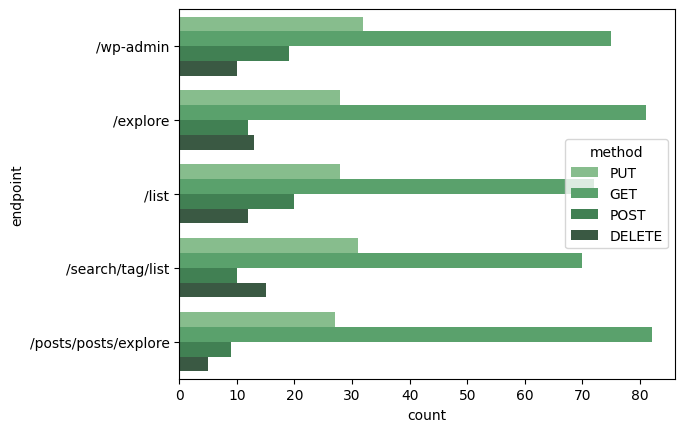

In [ ]:
sns.countplot(y="endpoint", hue="method", data=comp_df, palette="Greens_d",
              order=comp_df.endpoint.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='count', ylabel='status'>

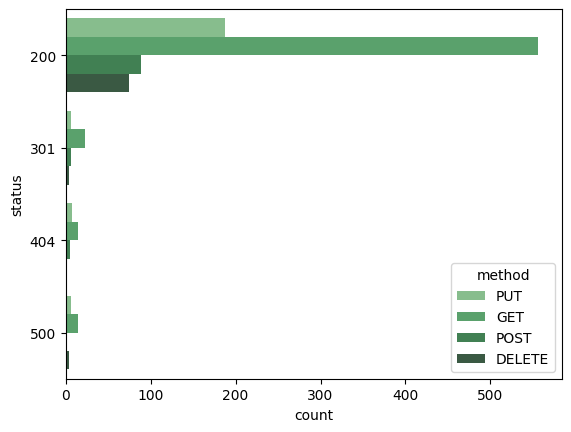

In [ ]:
sns.countplot(y="status", hue="method", data=comp_df, palette="Greens_d",
              order=comp_df.status.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='count', ylabel='protocol'>

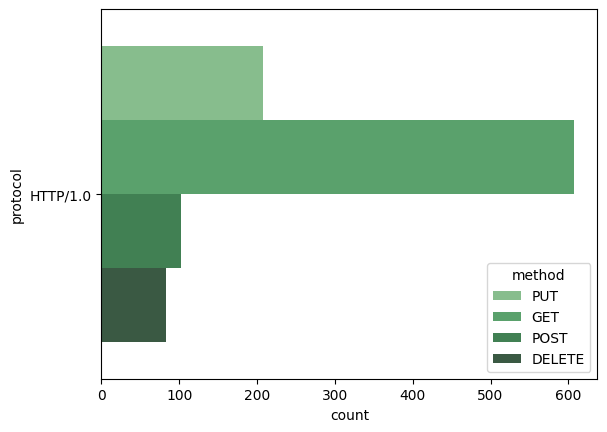

In [ ]:
sns.countplot(y="protocol", hue="method", data=comp_df, palette="Greens_d",
              order=comp_df.protocol.value_counts().iloc[:5].index)

<AxesSubplot:xlabel='count', ylabel='endpoint'>

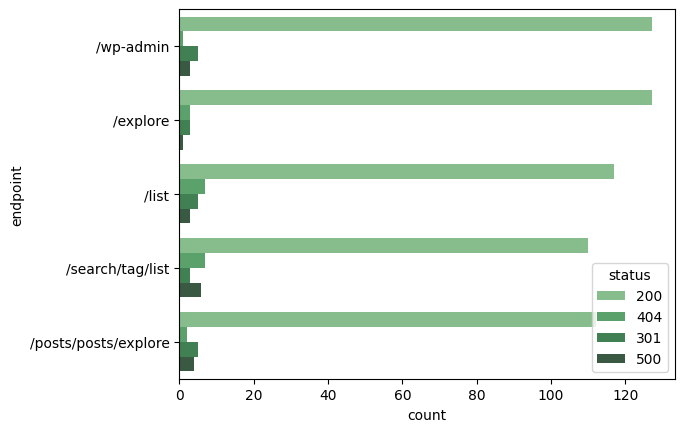

In [ ]:
sns.countplot(y="endpoint", hue="status", data=comp_df, palette="Greens_d",
              order=comp_df.endpoint.value_counts().iloc[:5].index)